In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

def scatter(x, y, xlim=None, ylim=None, size=None):
    args = dict()
    if size:
        args['figsize'] = (size[0], size[1])
    fig, ax = plt.subplots(**args)
    ax.scatter(x, y, marker=',', lw=0, s=1)
    ax.set_aspect('equal')
    plt.axhline(0, color='red')
    plt.axvline(0, color='red')
    ax.grid(True, which='both')
    if xlim:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim:
        ax.set_ylim(ylim[0], ylim[1])
    plt.show()

In [2]:
header = [
    'a',
    'e',
    'i',
    'g ("/yr) s',
    '("/yr)','RFL',
    'QCM',
    'QCO',
    'magn',
]
catalog = pd.read_csv(
    './input/catalogs/allnum.pro', 
    index_col=0,
    delim_whitespace=True,
    skiprows=3,
    names=header
)
# catalog[['a']]
dataset = catalog[['a', 'e', 'i']]
dataset

,a,e,i
1,2.76713,0.1150,0.1678
3,2.66931,0.2320,0.2308
4,2.36152,0.0987,0.1107
5,2.57617,0.2278,0.0788
6,2.42528,0.1623,0.2449
7,2.38612,0.2120,0.1104
8,2.20140,0.1444,0.0930
9,2.38642,0.1273,0.0817
10,3.14177,0.1355,0.0884
11,2.45226,0.0746,0.0677


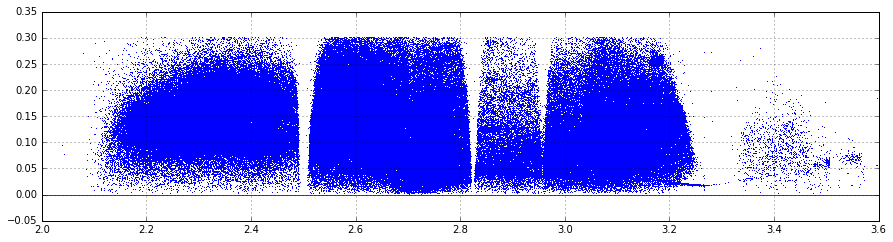

In [3]:
x = catalog['a']
y = catalog['e']
scatter(x, y, [2, 3.6], [-0.05, 0.35], [15, 15])

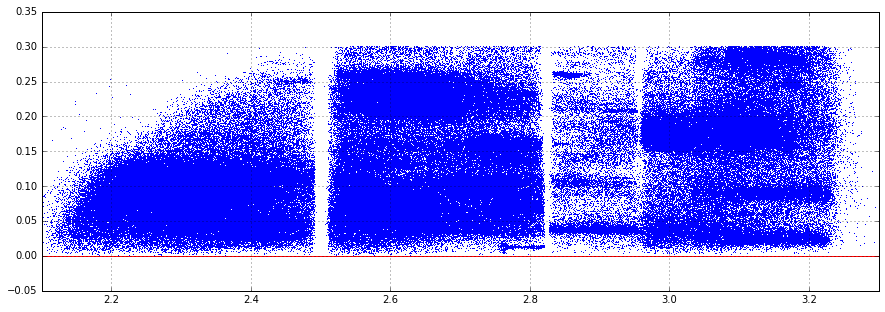

In [4]:
a_mask = (catalog['a'] > 2.1) & (catalog['a'] < 3.3)
# i_mask = (catalog['i'] > 3)
x = catalog[a_mask]['a']
y = catalog[a_mask]['i']
scatter(x, y, [2.1, 3.3], ylim=[-0.05, 0.35], size=[15, 15])

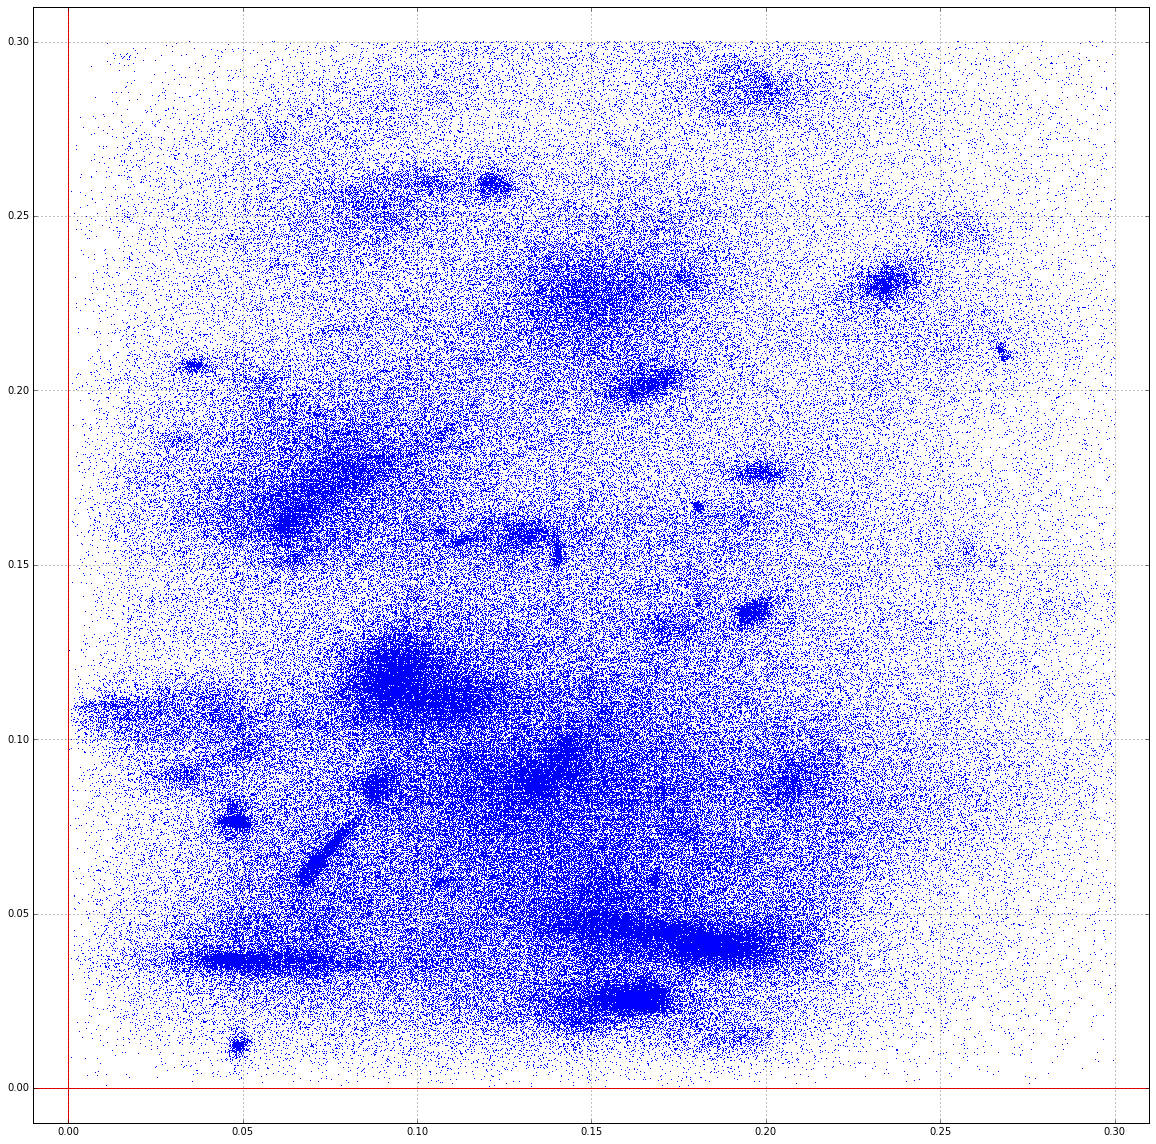

In [5]:
x = catalog['e']
y = catalog['i']
scatter(x, y, [-0.01, 0.31], ylim=[-0.01, 0.31], size=[20, 20])

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def _cluster(cluster_count, features):
    clr = AgglomerativeClustering(cluster_count, pooling_func=np.sum, affinity='euclidean', memory='./memory-cache')
    result = clr.fit_predict(features)
    return result

_cluster(21, dataset[:25000])